In [2]:
import autograd.numpy as np
import autograd.numpy.random as npr
import os
import scipy.io
import numpy as np2
import matplotlib.pyplot as plt
import pickle
npr.seed(0)

import ssm
import smartload.smartload as smart
from ssm.exputils import load_multiple_sessions, make_savedict
import src.blockhmm_validation as bval
from src.utils import pathsetup
npr.seed(0)

%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [9]:
# Setup evaluation parameters
nstates_lst=np.arange(1, 9)
N_iters=3000
frac_train=0.8

In [2]:
params = dict(nstates_lst=np.arange(1, 9),
                  N_iters=3000,
                  frac_train=0.8)
# params = dict(nstates_lst=[1], N_iters=10, frac_train=0.8)

animal_lst = ['f01', 'f02', 'f03', 'f04', 'f11', 'f12', 'e35', 'e40',
        'fh01', 'fh02', 'e53', 'fh03', 'f16', 'f17', 'f20', 'f21', 'f22', 'f23']

ll_lst_all = []
test_lens = []
for animal in animal_lst:
    print(f'Analyzing animal {animal}')
    ll_lst, nstates_lst, obs_train, obs_test = bval.run_and_validate(animal, 123, params)
    test_lens.append(obs_test.shape[0])
    ll_lst_all.append(ll_lst)

Analyzing animal f01
Starting run and save for f01, seed 123


100%|██████████| 107/107 [00:00<00:00, 430.26it/s]


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.8639726175892963


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 2.04432622747037


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.0441223051753896


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.2477215368493444


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 2.309894034824019


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.382875068971096


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.372534262097776


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.371457877770881
[1 2 3 4 5 6 7 8]
[0.8639726175892963, 2.04432622747037, 2.0441223051753896, 2.2477215368493444, 2.309894034824019, 2.382875068971096, 2.372534262097776, 2.371457877770881]
Analyzing animal f02
Starting run and save for f02, seed 123


100%|██████████| 23/23 [00:00<00:00, 445.69it/s]


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.38957187855749703


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 1.3229706370574656


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 1.3789923553888885


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 1.4017843100741076


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 1.4519314973862074


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 1.5301560536216947


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 1.3855870092957727


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 1.2743944682259984
[1 2 3 4 5 6 7 8]
[0.38957187855749703, 1.3229706370574656, 1.3789923553888885, 1.4017843100741076, 1.4519314973862074, 1.5301560536216947, 1.3855870092957727, 1.2743944682259984]
Analyzing animal f03
Starting run and save for f03, seed 123


100%|██████████| 72/72 [00:00<00:00, 638.92it/s]


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.046980839954394026


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 0.532771550516245


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 0.6426820190126461


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 0.7619805040613311


  0%|          | 0/3000 [00:00<?, ?it/s]

/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)
/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


Num states = 5, likelihood = 0.7949805242459452


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 0.790920250553306


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 0.7789550818611581


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 0.8469798548896267
[1 2 3 4 5 6 7 8]
[0.046980839954394026, 0.532771550516245, 0.6426820190126461, 0.7619805040613311, 0.7949805242459452, 0.790920250553306, 0.7789550818611581, 0.8469798548896267]
Analyzing animal f04
Starting run and save for f04, seed 123


100%|██████████| 70/70 [00:00<00:00, 632.92it/s]


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.10409263200055505


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 0.40888012401458973


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 0.3792895984947051


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 0.5785576077739855


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 0.6168946377652019


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 0.5744300932474309


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 0.5686121848697224


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 0.702762156670037
[1 2 3 4 5 6 7 8]
[0.10409263200055505, 0.40888012401458973, 0.3792895984947051, 0.5785576077739855, 0.6168946377652019, 0.5744300932474309, 0.5686121848697224, 0.702762156670037]
Analyzing animal f11
Starting run and save for f11, seed 123


100%|██████████| 59/59 [00:00<00:00, 714.83it/s]


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.9771824282579155


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 2.3049810172395953


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.4342849077581796


/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)
/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/Users/minhnhatle/Documents/ExternalCode/ssm/ssm/optimizers.py:149: UserWarning: L-BFGS-B failed with message:
ABNORMAL_TERMINATION_IN_LNSRCH
  warn("{} failed with message:\n{}".format(method, result.message))


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.438528236017204


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 2.5469310634488385


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.3420887763967233


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.5496789325175


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.619556105465595
[1 2 3 4 5 6 7 8]
[0.9771824282579155, 2.3049810172395953, 2.4342849077581796, 2.438528236017204, 2.5469310634488385, 2.3420887763967233, 2.5496789325175, 2.619556105465595]
Analyzing animal f12
Starting run and save for f12, seed 123


100%|██████████| 59/59 [00:00<00:00, 644.70it/s]


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 1.3871497490379576


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 2.211930260103133


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.3864774217219686


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.2691813215919168


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 2.4606799027405506


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.6177946305540933


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.6036140541011066


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.492817783472321
[1 2 3 4 5 6 7 8]
[1.3871497490379576, 2.211930260103133, 2.3864774217219686, 2.2691813215919168, 2.4606799027405506, 2.6177946305540933, 2.6036140541011066, 2.492817783472321]
Analyzing animal e35
Starting run and save for e35, seed 123


100%|██████████| 35/35 [00:00<00:00, 858.20it/s]


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.45796298526460866


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 1.9305839259093907


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.2418093686597214


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.156622520769808


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 2.4697236783736307


/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.33790106565771


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.064370773254836


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.207292551253129
[1 2 3 4 5 6 7 8]
[0.45796298526460866, 1.9305839259093907, 2.2418093686597214, 2.156622520769808, 2.4697236783736307, 2.33790106565771, 2.064370773254836, 2.207292551253129]
Analyzing animal e40
Starting run and save for e40, seed 123


100%|██████████| 33/33 [00:00<00:00, 985.90it/s]


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.6255786026309895


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 1.8228962274513143


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 1.970035572097732


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.0141230765975093


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 1.7585077445578827


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 1.867901703425648


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.026491456586914


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 1.969164439905054
[1 2 3 4 5 6 7 8]
[0.6255786026309895, 1.8228962274513143, 1.970035572097732, 2.0141230765975093, 1.7585077445578827, 1.867901703425648, 2.026491456586914, 1.969164439905054]
Analyzing animal fh01
Starting run and save for fh01, seed 123


100%|██████████| 10/10 [00:00<00:00, 1081.90it/s]


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.5505508387558008


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 1.6533493831115897


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.2266272014630193


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.3470360504830494


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 1.6471299359261664


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.156038565666062


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.5587555381094016


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.5515082348320806
[1 2 3 4 5 6 7 8]
[0.5505508387558008, 1.6533493831115897, 2.2266272014630193, 2.3470360504830494, 1.6471299359261664, 2.156038565666062, 2.5587555381094016, 2.5515082348320806]
Analyzing animal fh02
Starting run and save for fh02, seed 123


100%|██████████| 18/18 [00:00<00:00, 1269.42it/s]


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.37678292670309566


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 2.27000738042239


/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)
/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.2788680031214494


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.1908704762188855


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 2.36035389529446


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.137393154610754


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.0507822859628995


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.1703944992771054
[1 2 3 4 5 6 7 8]
[0.37678292670309566, 2.27000738042239, 2.2788680031214494, 2.1908704762188855, 2.36035389529446, 2.137393154610754, 2.0507822859628995, 2.1703944992771054]
Analyzing animal e53
Starting run and save for e53, seed 123


100%|██████████| 77/77 [00:00<00:00, 592.72it/s]


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.013645203252368584


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 0.5873609460146558


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 0.5617235945751797


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 0.663771743308901


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 0.6512816664819698


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 0.643384313444388


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 0.6833213744840335


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 0.6493001790905545
[1 2 3 4 5 6 7 8]
[0.013645203252368584, 0.5873609460146558, 0.5617235945751797, 0.663771743308901, 0.6512816664819698, 0.643384313444388, 0.6833213744840335, 0.6493001790905545]
Analyzing animal fh03
Starting run and save for fh03, seed 123


100%|██████████| 34/34 [00:00<00:00, 915.58it/s]


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.6605188839886849


  0%|          | 0/3000 [00:00<?, ?it/s]

/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)
/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


Num states = 2, likelihood = 2.375321659757048


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.5385785183409046


/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))
/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.670692664539532


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 2.495557026697959


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.5936115802696866


/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)
/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.6724804716369337


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.934690619174891
[1 2 3 4 5 6 7 8]
[0.6605188839886849, 2.375321659757048, 2.5385785183409046, 2.670692664539532, 2.495557026697959, 2.5936115802696866, 2.6724804716369337, 2.934690619174891]
Analyzing animal f16
Starting run and save for f16, seed 123


100%|██████████| 25/25 [00:00<00:00, 986.38it/s]


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 1.2249703544142099


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 2.210416032854736


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.7817703789153487


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 2.570365595161729


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 2.6992950410135945


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.682256828279445


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.6237857342656308


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.45331134087526
[1 2 3 4 5 6 7 8]
[1.2249703544142099, 2.210416032854736, 2.7817703789153487, 2.570365595161729, 2.6992950410135945, 2.682256828279445, 2.6237857342656308, 2.45331134087526]
Analyzing animal f17
Starting run and save for f17, seed 123


100%|██████████| 25/25 [00:00<00:00, 990.96it/s]


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 1.2400377162964349


/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 2.3639777729962184


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.4309563183870293


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 1.762354359994653


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 2.171254343685215


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.1003338158862195


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 2.1086013270624444


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.0999568105710704
[1 2 3 4 5 6 7 8]
[1.2400377162964349, 2.3639777729962184, 2.4309563183870293, 1.762354359994653, 2.171254343685215, 2.1003338158862195, 2.1086013270624444, 2.0999568105710704]
Analyzing animal f20
Starting run and save for f20, seed 123


100%|██████████| 24/24 [00:00<00:00, 1077.11it/s]


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 0.29407768203799967


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 1.3355632521715501


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 1.5654762129460842


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 1.2388471148158358


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 1.1583517134902692


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 1.4985452914657504


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 1.0363718090871985


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 1.5924458190977948
[1 2 3 4 5 6 7 8]
[0.29407768203799967, 1.3355632521715501, 1.5654762129460842, 1.2388471148158358, 1.1583517134902692, 1.4985452914657504, 1.0363718090871985, 1.5924458190977948]
Analyzing animal f21
Starting run and save for f21, seed 123


100%|██████████| 24/24 [00:00<00:00, 938.19it/s]


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = 1.297128708865482


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 1.8752427001839296


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 2.060910540212107


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 1.9643550226049757


/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:75: RuntimeWarning: invalid value encountered in multiply
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)
/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 2.0853148962195935


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 2.1348969369539708


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 1.919072283160968


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 2.216532848571125
[1 2 3 4 5 6 7 8]
[1.297128708865482, 1.8752427001839296, 2.060910540212107, 1.9643550226049757, 2.0853148962195935, 2.1348969369539708, 1.919072283160968, 2.216532848571125]
Analyzing animal f22
Starting run and save for f22, seed 123


100%|██████████| 12/12 [00:00<00:00, 1199.74it/s]


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = -0.1842107663759167


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = 1.736314416547093


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = 0.16751237838597724


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 1.2747797065857893


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = 0.49065667404307367


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = 0.4972830391244793


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = 0.34482130127755717


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = 0.21891001398632598
[1 2 3 4 5 6 7 8]
[-0.1842107663759167, 1.736314416547093, 0.16751237838597724, 1.2747797065857893, 0.49065667404307367, 0.4972830391244793, 0.34482130127755717, 0.21891001398632598]
Analyzing animal f23
Starting run and save for f23, seed 123


100%|██████████| 11/11 [00:00<00:00, 1269.15it/s]


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 1, likelihood = -0.1407927334151032


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 2, likelihood = -0.000635321952022957


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 3, likelihood = -0.029888027301308826


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 4, likelihood = 0.4380984750043763


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 5, likelihood = -0.297370073493203


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 6, likelihood = -0.2691454590465537


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 7, likelihood = -0.5392284488142968


  0%|          | 0/3000 [00:00<?, ?it/s]

Num states = 8, likelihood = -0.274718920901939
[1 2 3 4 5 6 7 8]
[-0.1407927334151032, -0.000635321952022957, -0.029888027301308826, 0.4380984750043763, -0.297370073493203, -0.2691454590465537, -0.5392284488142968, -0.274718920901939]


5
5
7
7
7
5
4
3
3
1
3
7
2
2
2
7
1
3


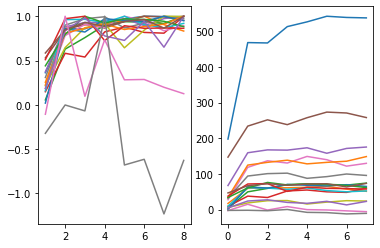

In [10]:
aic_lst = []
for i in range(len(ll_lst_all)):
    plt.subplot(121)
    idmax = np.argmax(ll_lst_all[i])
    plt.plot(np.arange(1, 9), ll_lst_all[i] / max(ll_lst_all[i]))
    aic = np.array(ll_lst_all[i]) * test_lens[i] * np.log(2) - np.arange(1, 9)
    plt.subplot(122)
    aic_lst.append(aic)
    plt.plot(aic)
    print(np.argmax(aic))

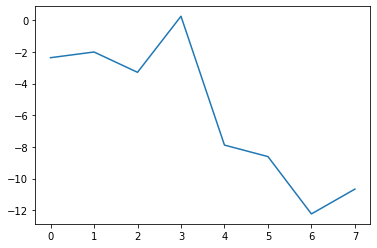

In [7]:
plt.plot(aic)

In [12]:
pickle.dump(dict(animal_lst=animal_lst,
                ll_lst_all=ll_lst_all,
                params=params,
                 aic_lst=aic_lst,
                seed=123), open('blockhmm_validation_120221.pkl', "wb" ))

In [11]:
# Load the saved pkl file
version = '120221'
paths = pathsetup('matchingsim')
rootdir = f"{paths['blockhmmfitpath']}/K_selection/"
savedfilepath = rootdir + f"blockhmm_validation_{version}.pkl"
matfilepath = rootdir + f"blockhmm_validation_{version}.mat"


In [12]:
with open(savedfilepath, "rb" ) as f:
    data= pickle.load(f)

In [21]:
data.update(dict(nstates_lst=nstates_lst, frac_train=frac_train, N_iters=N_iters,
                version=version, savedfilepath=savedfilepath, matfilepath=matfilepath))

In [22]:
scipy.io.savemat(matfilepath, data)

In [14]:
data.update('')

{'animal_lst': ['f01',
  'f02',
  'f03',
  'f04',
  'f11',
  'f12',
  'e35',
  'e40',
  'fh01',
  'fh02',
  'e53',
  'fh03',
  'f16',
  'f17',
  'f20',
  'f21',
  'f22',
  'f23'],
 'll_lst_all': [[0.8639726175892963,
   2.04432622747037,
   2.0441223051753896,
   2.2477215368493444,
   2.309894034824019,
   2.382875068971096,
   2.372534262097776,
   2.371457877770881],
  [0.38957187855749703,
   1.3229706370574656,
   1.3789923553888885,
   1.4017843100741076,
   1.4519314973862074,
   1.5301560536216947,
   1.3855870092957727,
   1.2743944682259984],
  [0.046980839954394026,
   0.532771550516245,
   0.6426820190126461,
   0.7619805040613311,
   0.7949805242459452,
   0.790920250553306,
   0.7789550818611581,
   0.8469798548896267],
  [0.10409263200055505,
   0.40888012401458973,
   0.3792895984947051,
   0.5785576077739855,
   0.6168946377652019,
   0.5744300932474309,
   0.5686121848697224,
   0.702762156670037],
  [0.9771824282579155,
   2.3049810172395953,
   2.4342849077581796,
 